<h1>탐색적 데이터 분석</h1>

# 데이터 불러오기

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True,as_frame=True)
id2label = ['setosa','versicolor','virginica']
species = [id2label[i] for i in y]
data = X.copy()
data.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
data['Species'] = species

In [2]:
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 데이터 요약

In [3]:
# 데이터 크기
data.shape

(150, 5)

In [4]:
# 변수 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# 수치형 변수 대표값과 분포
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# 범주형 변수 도수분포
data['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

# 데이터 시각화

array([[<AxesSubplot:title={'center':'SepalLength'}>,
        <AxesSubplot:title={'center':'SepalWidth'}>],
       [<AxesSubplot:title={'center':'PetalLength'}>,
        <AxesSubplot:title={'center':'PetalWidth'}>]], dtype=object)

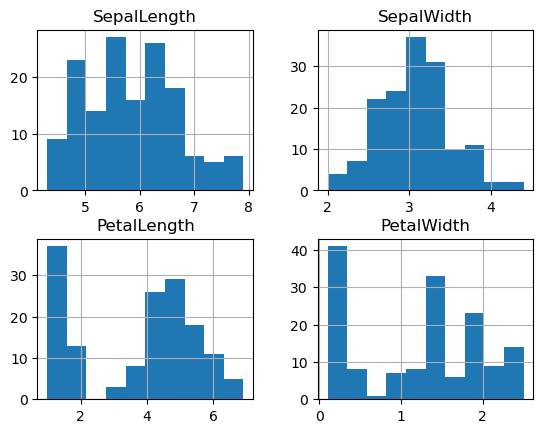

In [7]:
# 히스토그램
data.hist()

In [ ]:
# 박스 플롯
data.boxplot()

# 이변량 데이터 분석

수치-수치

In [8]:
# 상관계수
data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.117570,0.871754,0.817941
SepalWidth,-0.117570,1.000000,-0.428440,-0.366126
PetalLength,0.871754,-0.428440,1.000000,0.962865
PetalWidth,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:xlabel='SepalLength', ylabel='SepalWidth'>

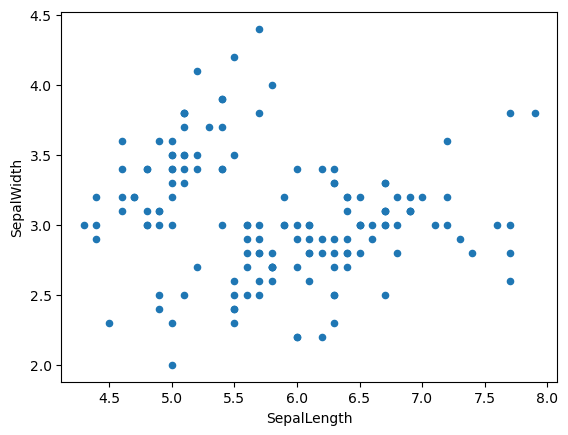

In [9]:
# 산점도
data.plot.scatter('SepalLength','SepalWidth')

수치-범주

<AxesSubplot:title={'center':'SepalLength'}, xlabel='Species'>

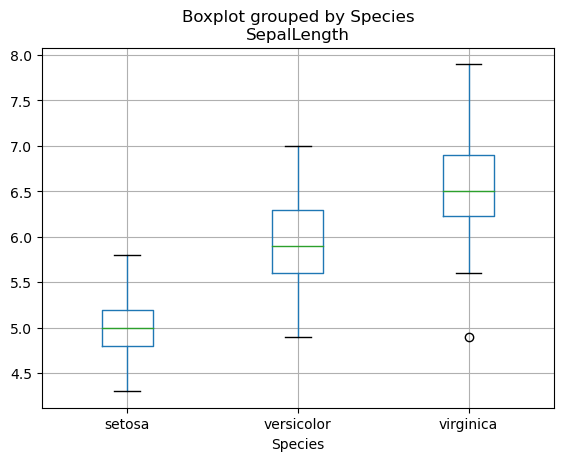

In [10]:
# 범주별 박스 플롯
data.boxplot('SepalLength',by='Species')

In [11]:
# 범주별 평균
data.groupby('Species').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [12]:
# 범주별 분산
data.groupby('Species').var()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


In [13]:
# setosa와 versicolor 사이의 SMD
import math
d = abs(5.006 - 5.936)
n1 = 50
n2 = 50
s = math.sqrt( ((n1-1)*0.124249 + (n2-1)*0.266433)/(n1+n2-2) )
smd = d/s
print(smd)

2.104196264251805


범주-범주

In [14]:
# 현재 데이터에는 범주형 변수가 한 개이기 때문에 보기 어려움
# pd.crosstab(변수1, 변수2) 의 형태로 크로스테이블을 볼 수 있음

# 연습문제

아래의 tips 데이터에 대하여 물음에 답하시오.
1. 총 변수의 수와 표본의 수는 몇 개인가?
2. 수치형 변수와 범주형 변수의 수는 몇 개인가?
3. 각 변수를 요약하고 대표값과 분포에 대한 값을 구하시오.
4. total_bill과 tip의 상관계수는 얼마인가?
5. tip과 sex와의 관계에서 SMD는 얼마인가? (양수로 답하시오)
6. sex와 smoker와의 관계에서 odd ratio는 얼마인가? Hint: pd.crosstab을 이용하여 크로스테이블을 먼저 구하세요. (1보다 큰 수로 답하시오)

In [15]:
import seaborn as sns
data = sns.load_dataset('tips')

In [16]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
# 1 총 변수의 수와 표본의 수는 몇 개인가?
data.shape

# 변수 수: 7개
# 표본 수: 244개

(244, 7)

In [ ]:
# 수치형 변수와 범주형 변수의 수는 몇 개인가?
data.info()

In [25]:
# 각 변수를 요약하고 대표값과 분포에 대한 값을 구하시오.
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [35]:
# total_bill과 tip의 상관계수는 얼마인가?
data.corr()
data[['total_bill', 'tip']].corr()


# 0.68 

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [37]:
# tip과 sex와의 관계에서 SMD는 얼마인가? (양수로 답하시오)
data.groupby('sex').mean()


,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [38]:
data.groupby('sex').var()

,total_bill,tip,size
sex,,,
Male,85.497185,2.217424,0.913931
Female,64.147429,1.344428,0.879177


In [39]:
import math
d = abs(3.089618 - 2.833448)
n1 = 244
n2 = 244
s = math.sqrt( ((n1-1)*2.217424 + (n2-1)*1.344428)/(n1+n2-2) )
smd = d/s
print(smd)

0.19195760871562068


In [44]:
# sex와 smoker와의 관계에서 odd ratio는 얼마인가? 
# Hint: pd.crosstab을 이용하여 크로스테이블을 먼저 구하세요. (1보다 큰 수로 답하시오)


pd.crosstab(data['sex'], data['smoker'])

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [45]:
# odd_ratio = ad/bc

(60*54)/(33*97)

1.0121836925960637